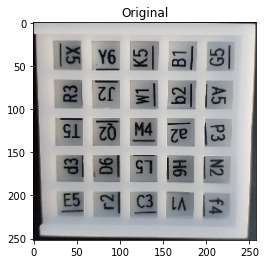

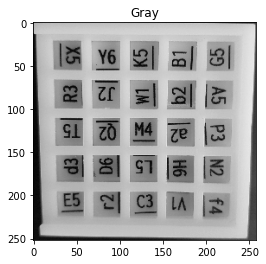

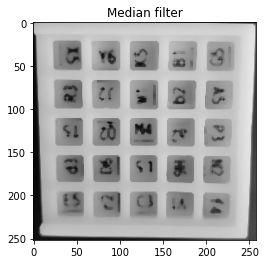

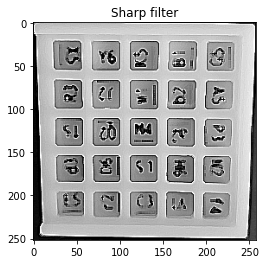

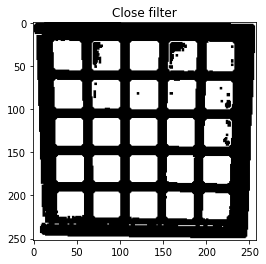

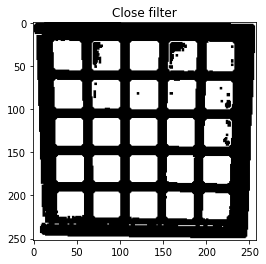

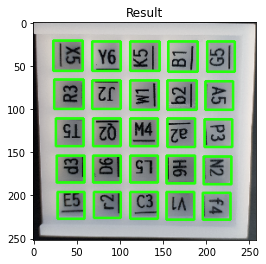

In [1]:
#lib
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

color = cv.imread('Photos/uenUq.png')
gray = cv.cvtColor(color, cv.COLOR_BGR2GRAY)
median = cv.medianBlur(gray,5)
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharp = cv.filter2D(median, -1, kernel)
thresh = cv.threshold(sharp, 160,255, cv.THRESH_BINARY_INV)[1]
# kernel = np.ones((6,6),np.uint8)
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)
contours = cv.findContours(close, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

plt.title("Original")
plt.imshow(color)
plt.show()

min_area = 100
max_area = 1500
image_number = 0
for c in contours:
    area = cv.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv.boundingRect(c)
        ROI = color[y:y+h, x:x+h]
        cv.imwrite('Photos/ROI_{}.png'.format(image_number), ROI)
        cv.rectangle(color, (x, y), (x + w, y + h), (36,255,12), 2)
        image_number += 1
        

        
plt.title("Gray")
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.title("Median filter")
plt.imshow(median, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.title("Sharp filter")
plt.imshow(sharp, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.title("Close filter")
plt.imshow(close, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.title("Close filter")
plt.imshow(close, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.title("Result")
plt.imshow(color)
plt.show()

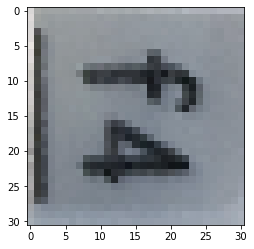

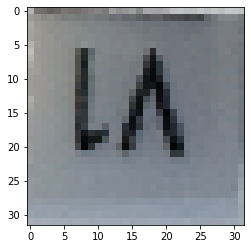

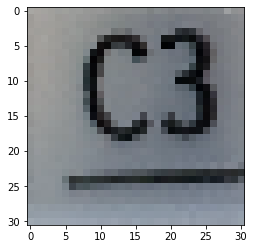

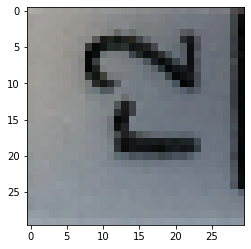

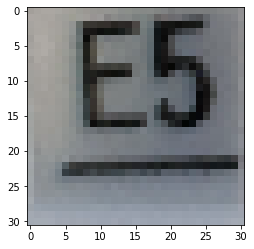

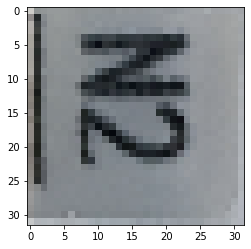

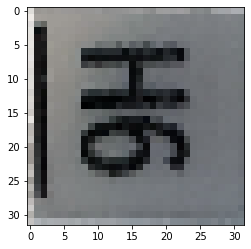

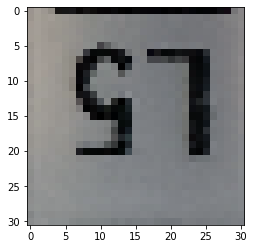

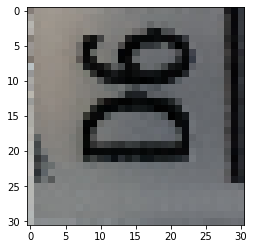

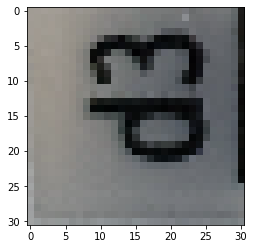

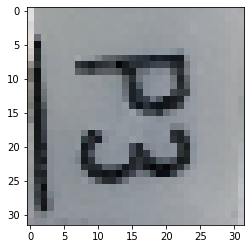

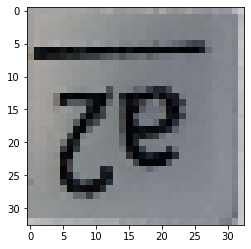

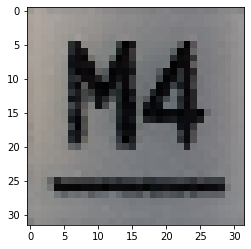

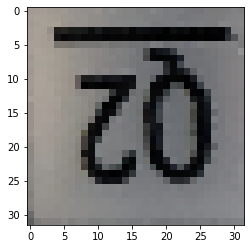

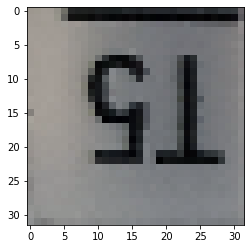

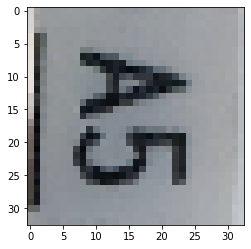

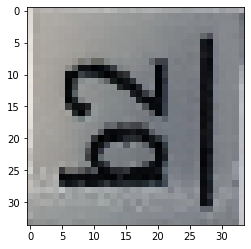

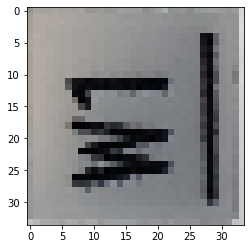

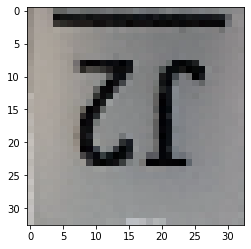

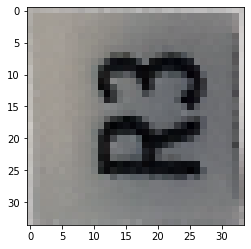

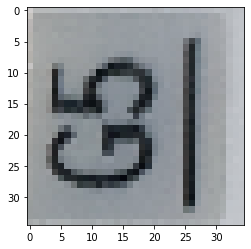

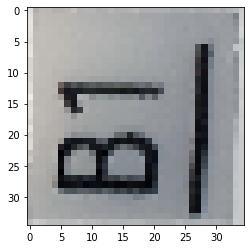

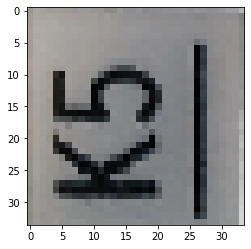

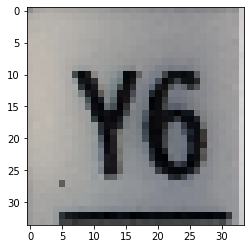

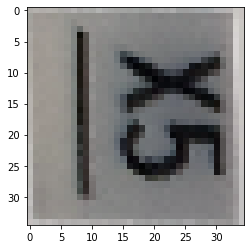

In [2]:
for i in range(25):
    a = 'Photos/ROI_{}.png'.format(i)
    b = cv.imread(a)
    plt.imshow(b)
    plt.show()

https://stackoverflow.com/questions/55169645/square-detection-in-image?newreg=0d57e885b3f14f9f9d4137c40087bfd7